In [62]:
from network_models.soundsream_models_and_utils.ss_encoderbased_model import SSClipBasedModel
from utils.audio_dataset_utils import train_val_dataset
from network_models.soundsream_models_and_utils.ss_model_dim_red import SSDimRedModel
from network_models.soundsream_models_and_utils.ss_model_conv import SSConvModel3Sec
from network_models.soundsream_models_and_utils.ss_encoded_dataset import ss_encoded_dataset_full
import torch
from torch.utils.data import DataLoader
from network_models.soundsream_models_and_utils.ss_complex_conv_net import SSComplexConvModel3Sec

device = "cuda" if torch.cuda.is_available() else "cpu"
batch_size = 6

data_set= ss_encoded_dataset_full(
    csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks/content/data/encoder_datasets/encodings_justCafe.pkl", device="cuda")

data_set1= ss_encoded_dataset_full(
    csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks/content/data/encoder_datasets/full_encodings_with_umap.pkl", device="cuda")


model = SSClipBasedModel(eval_mode=True).to(device)

trainDS, testDs = train_val_dataset(data_set, val_split=0.1, seed=100)
trainDS, valDs = train_val_dataset(trainDS, val_split=0.1, seed=100)

In [15]:
model.load_state_dict(torch.load("/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks/content/soundstream/experiments/from_clip/Nr4_fullPipline_noCafe/emo_reco_best_ep97_acc_96.pth"))

<All keys matched successfully>

In [16]:
from utils.utils__evalutation import evaluate
from utils.eval_utils import classificationReport, confusion_matrix
trueConv, predsConv = evaluate("cuda", model, data_set, batch_size)
print("------------------ Conv: ----------------")
classificationReport(trueConv, predsConv, data_set.encoded_dataset.label_list)
confusion_matrix(trueConv, predsConv, data_set.encoded_dataset.label_list)

print()

0 of 936
60 of 936
120 of 936
180 of 936
240 of 936
300 of 936
360 of 936
420 of 936
480 of 936
540 of 936
600 of 936
660 of 936
720 of 936
780 of 936
840 of 936
900 of 936
------------------ Conv: ----------------
           accuracy  precision  recall   support
   angry     0.218     0.235     0.319    144
 disgust     0.218     0.208     0.326    144
    fear     0.218     0.205     0.299    144
   happy     0.218     0.240     0.167    144
 neutral     0.218     0.103     0.042    72
     sad     0.218     0.208     0.188    144
surprise     0.218     0.311     0.097    144
                                          936

 
     avg     0.218     0.216     0.205    

                   angry     disgust        fear       happy     neutral         sad    surprise    support
       angry       0.319       0.243       0.257       0.090       0.007       0.042       0.042        144
     disgust       0.222       0.326       0.174       0.062       0.021       0.188       0.007        14

In [60]:
#import  numpy as np
#from sklearn.neighbors import KDTree
#
#def EvaluateNearestNeighbour(dataset, test_dataset, batch_size):
#    ds = dataset.encoded_dataset.encodedData["encoded"].to_numpy()
#
#    npds = np.asarray([fp.numpy() for fp in ds])
#    true, preds = [], []
#    loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
#    kdt = KDTree(npds, metric='euclidean')
#    with torch.no_grad():
#        for batch, (X, z) in enumerate(loader):
#            labels = [torch.squeeze(a.nonzero()).item() for a in z]
#            true = true + labels
#
#            for code in X:
#                cv = kdt.query(np.atleast_2d(code), k=1, return_distance=False)[0, 0]
#                #torch.squeeze(dataset[cv][1].nonzero()).item()
#                preds = preds + [dataset[cv][1].nonzero()[0][0]]
#
#    return true, preds
#            #preds = preds + pred.argmax(1).cpu().numpy().tolist()
#

In [ ]:
# data_set_ji= ss_encoded_dataset_full(
#    csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/justInduced_noUmap.pkl", device="cuda")
#
# trueConv, predsConv = EvaluateNearestNeighbour(data_set1, data_set_ji, batch_size)
# classificationReport(trueConv, predsConv, data_set.encoded_dataset.label_list)
# confusion_matrix(trueConv, predsConv, data_set.encoded_dataset.label_list)

In [4]:
import umap
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

lst = [tens.numpy() for tens in data_set.encoded_dataset.encodedData["encoded"]]

df = pd.DataFrame(data_set.encoded_dataset.encodedData)


pca = PCA(n_components=20)
out = pca.fit(np.asarray(lst).T)

# np.asarray(lst).T
df["pca"]=[i for i in out.components_.T]

In [47]:
umap = umap.UMAP(n_components = 4, n_neighbors=5000)
out = umap.fit(np.asarray(lst))
df = pd.DataFrame(data_set.encoded_dataset.encodedData)

In [52]:
pcaOut=np.asarray([i for i in out.embedding_])
pcaOut = 2 * (pcaOut - pcaOut.min(axis=0)) / (pcaOut.max(axis=0) - pcaOut.min(axis=0)) - 1
#df["pca"]=[i for i in out.embedding_]
df["pca"] = pcaOut.tolist()

In [53]:
array = np.array(df.loc[df["clear_emotion"].isin(["happy"])]["pca"].values.tolist(), dtype=object)
emoDict = {}
emodichtNorm =  {}

for label in data_set.encoded_dataset.label_list:
    umap = np.array(df.loc[df["clear_emotion"].isin([label])]["pca"].values.tolist(), dtype=object)
    #normalized = 2 * (pca - pca.min(axis=0)) / (pca.max(axis=0) - pca.min(axis=0)) - 1
    emoDict.update({label: umap})
    emodichtNorm.update({label: umap})



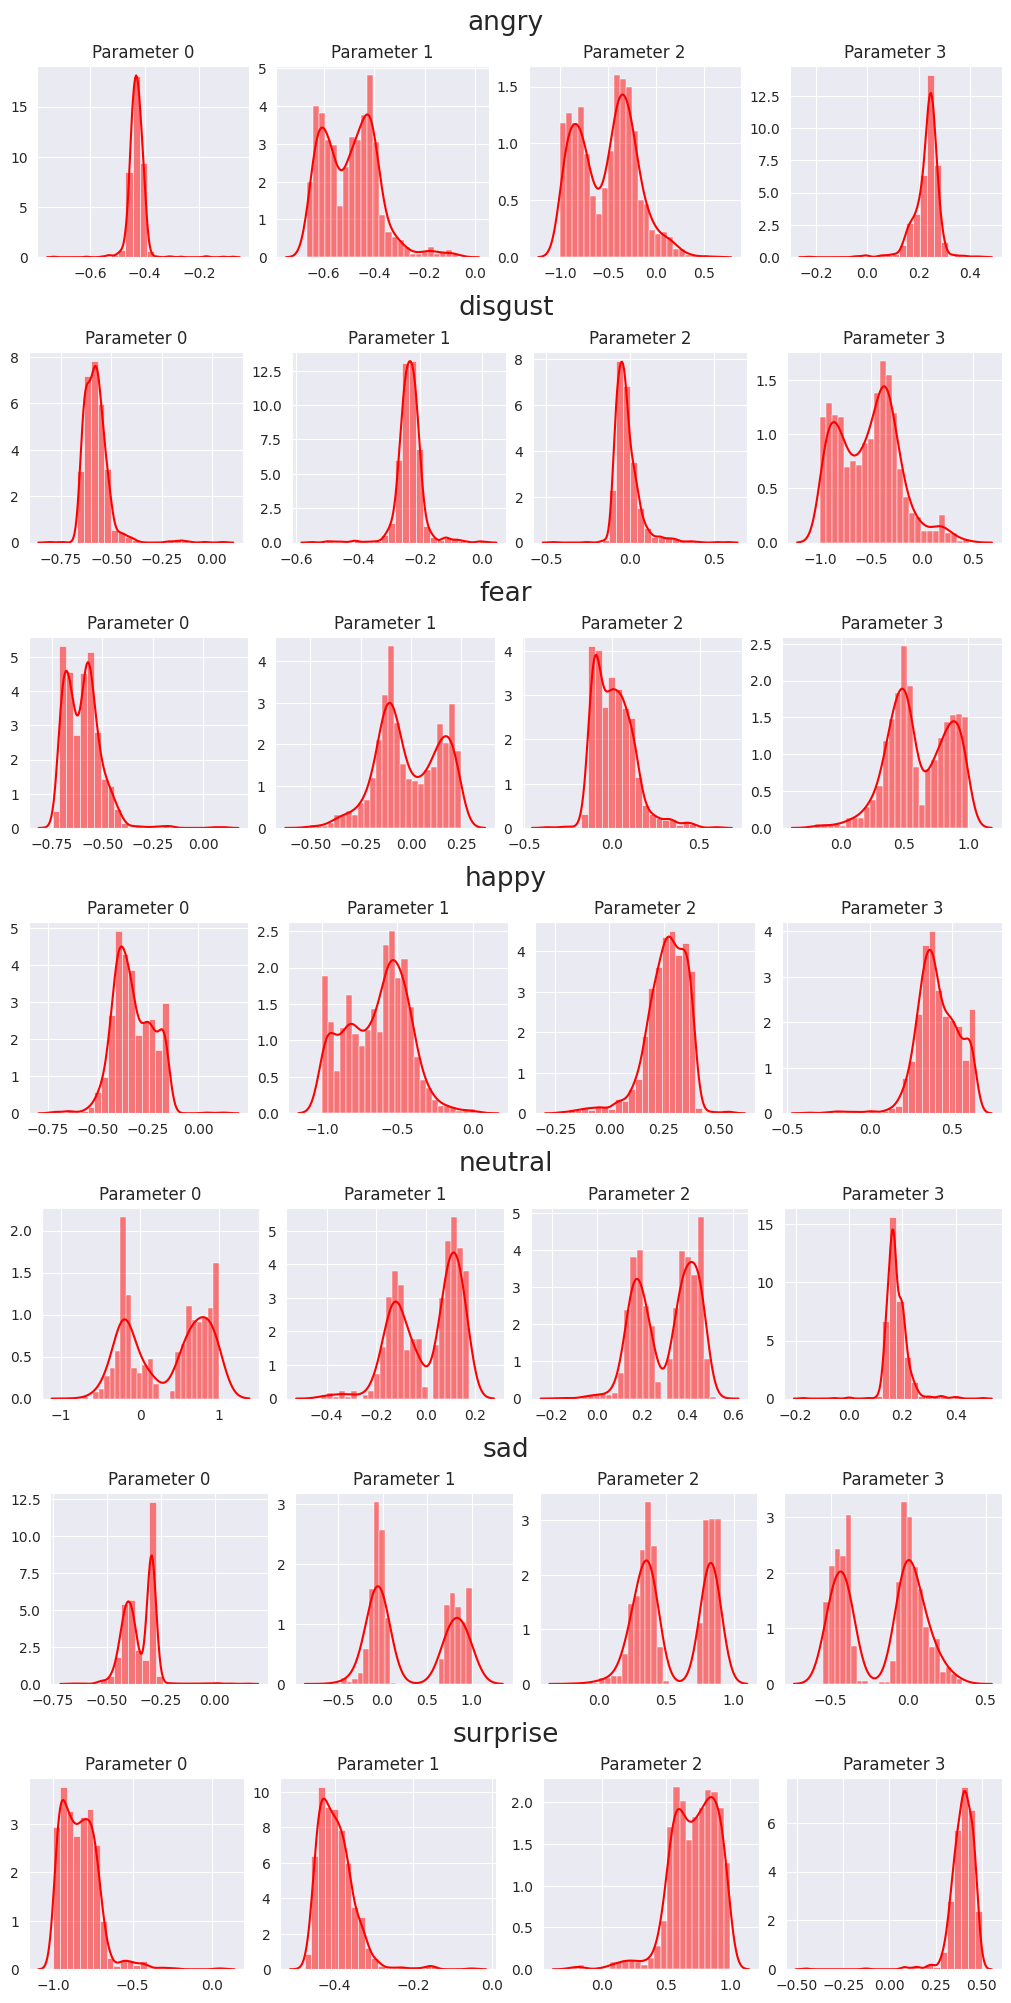

In [54]:
from utils.utils__evalutation import show_bars

#show_bars(emoDict, data_set.encoded_dataset.label_list)
show_bars(emodichtNorm, data_set.encoded_dataset.label_list)